In [1]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from copy import deepcopy
# import plotly.graph_objects as go
from scipy.optimize import curve_fit
from dataclasses import make_dataclass

import sys
module_path = 'src' 
if module_path not in sys.path:
    sys.path.append(module_path)

# Markus's code
from MM_Plot_Utils import plot, hist
from MM_Maze_Utils import *
from MM_Traj_Utils import *

%matplotlib inline
%reload_ext autoreload
%autoreload 2

from scipy.special import softmax
from plot_utils import plot_trajectory, PlotMazeFunction_gradientcmap
import evaluation_metrics

In [2]:
# Some lists of nicknames for mice
RewNames=['B1','B2','B3','B4','C1','C3','C6','C7','C8','C9']
UnrewNames=['B5','B6','B7','D3','D4','D5','D6','D7','D8','D9']
AllNames=RewNames+UnrewNames
UnrewNamesSub=['B5','B6','B7','D3','D4','D5','D7','D8','D9'] # excluding D6 which barely entered the maze

In [3]:
all_trajs = []
ma = NewMaze()
for rat in RewNames:
    tf = LoadTraj(rat+'-tf')
    this_trajs = np.array([])
    for i in range(len(tf.no)):
        this_trajs = np.concatenate((this_trajs, tf.no[i][:,0]))
    all_trajs.append(this_trajs)

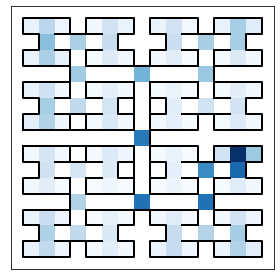

In [4]:
PlotMazeFunction_gradientcmap(np.concatenate(all_trajs), ma, False, 'Blues')
plt.show()

In [5]:
all_effi_values = []
for rat in RewNames:
    tf = LoadTraj(rat+'-tf')
    this_trajs = np.array([])
    for i in range(len(tf.no)):
        this_trajs = np.concatenate((this_trajs, tf.no[i][:,0]))
    effi = evaluation_metrics.exploration_efficiency_sequential([this_trajs])
    effi_keys = effi.keys()
    effi_values = list(effi.values())
    all_effi_values.append(effi_values)
mean_effi_values = np.nanmean(np.array(all_effi_values), axis = 0)
explo_effi = {k:v for k,v in zip(effi_keys, mean_effi_values)}

<ipython-input-5-2cfa0c66c982>:11: RuntimeWarning: Mean of empty slice
  mean_effi_values = np.nanmean(np.array(all_effi_values), axis = 0)


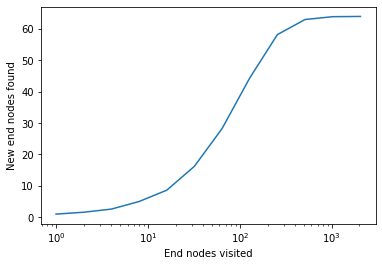

In [6]:
#plt.figure(figsize=(8,5))
plt.plot(explo_effi.keys(), explo_effi.values())
plt.xscale('log')
plt.xlabel('End nodes visited')
plt.ylabel('New end nodes found')
plt.show()

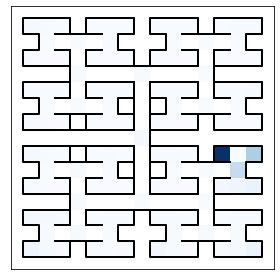

In [15]:
all_rwd_source = []
for rat in RewNames:
    tf = LoadTraj(rat+'-tf')
    this_trajs = np.array([])
    for i in range(len(tf.no)):
        this_trajs = np.concatenate((this_trajs, tf.no[i][:,0]))
    rwd_source = evaluation_metrics.get_direct_paths([list(this_trajs)], 116, 'source')
    all_rwd_source.extend(rwd_source)

PlotMazeFunction_gradientcmap(all_rwd_source, ma, False, 'Blues')
plt.show()

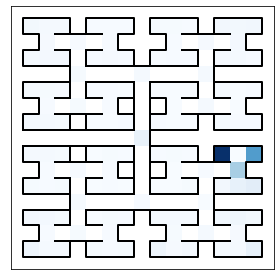

In [16]:
all_rwd_target = []
for rat in RewNames:
    tf = LoadTraj(rat+'-tf')
    this_trajs = np.array([])
    for i in range(len(tf.no)):
        this_trajs = np.concatenate((this_trajs, tf.no[i][:,0]))
    rwd_source = evaluation_metrics.get_direct_paths([list(this_trajs)], 116, 'target')
    all_rwd_source.extend(rwd_source)

PlotMazeFunction_gradientcmap(all_rwd_source, ma, False, 'Blues')
plt.show()

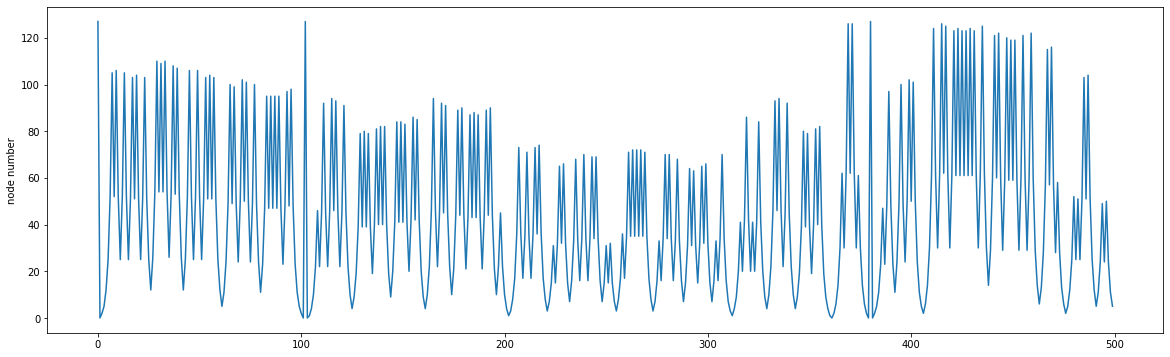

In [20]:
plt.figure(figsize=(20,6))
plt.plot(this_trajs[:500])
plt.ylabel('node number')
plt.show()